# Load Processed Data

In [2]:
%run ./Airbnb_DataSource_n_DataWrangling.ipynb

total 3162
-rw-r--r-- 1 khyat 197609 3124181 Sep 26 15:50 Airbnb.pptx
drwxr-xr-x 1 khyat 197609       0 Oct  1 13:05 Data
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:22 Data_Original
drwxr-xr-x 1 khyat 197609       0 Oct  3 01:37 Data_Output
drwxr-xr-x 1 khyat 197609       0 Oct  1 12:55 Temp
drwxr-xr-x 1 khyat 197609       0 Oct  2 23:55 Visualization_Output
-rw-r--r-- 1 khyat 197609      39 May  9 10:15 apikey.txt
-rw-r--r-- 1 khyat 197609   94729 Oct  3 01:56 treeClassifier.txt
-rw-r--r-- 1 khyat 197609     165 Sep 26 13:19 ~$Airbnb.pptx


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
./Airbnb_DataSource_n_DataWrangling.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [
./Airbnb_DataSource_n_DataWrangling.ipynb:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  "cells": [
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [3]:
df.head(n=2)
# print(df.shape)

,id,scrape_id,last_scraped,name,summary,description,experiences_offered,host_id,host_name,host_since,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_group,room_type_num
0,13913,20190710134553,2019-07-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,My bright double bedroom with a large window h...,business,54730,Alina,2009-11-16,...,moderate,f,f,3,1,2,0,0.15,medium,0
1,15400,20190710134553,2019-07-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Lots of windows and light. St Luke's Gardens ...,romantic,60302,Philippa,2009-12-05,...,strict_14_with_grace_period,t,t,1,1,0,0,0.73,medium,1


### Google Map to show Price by Location
The below google map can be zoomed in and out. We see that price is more in the city centre and decreases as we go far from the centre. Also, there are more listings in the centre.

In [4]:
df[['latitude', 'longitude']].head()

,latitude,longitude
0,51.56802,-0.11121
1,51.48796,-0.16898
2,51.52098,-0.14002
3,51.47298,-0.16376
4,51.44687,-0.21874


In [5]:
with open('apikey.txt') as f:
    api_key = f.readline()
    f.close
    
# api_key

In [6]:
gmaps.configure(api_key=api_key)

In [7]:
# Get the locations from the data set
locations = df[['latitude', 'longitude']]
#Get the price from the data
price = df['price']
#Set up your map
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations, weights=price))
fig

Figure(layout=FigureLayout(height='420px'))

# Geospatial Analysis (In development, not completed)

In [7]:
# df['geometry'] = df.apply(lambda row: Point(row.latitude, row.longitude), axis=1)
# df[['latitude', 'longitude', 'geometry']].head(n=5)
geometry = df.apply(lambda row: Point(row.latitude, row.longitude), axis=1)

In [8]:
df = geopandas.GeoDataFrame(df, geometry=geometry)

In [9]:
df.crs = {'init':'epsg:4326'}

In [11]:
coder = geopy.Nominatim(user_agent='scipy2019-intermediate-gds')

In [12]:
df.head(2)[['latitude', 'longitude']]\
        .apply(lambda coord: coder.reverse(coord).address, axis=1)

0    Zasman Vet, Tollington Park, New Orleans Estat...
1    HCA Sydney Street, 102, Sydney Street, Chelsea...
dtype: object

In [13]:
address = coder.reverse((df.latitude[0], df.longitude[0]))
address

Location(Zasman Vet, Tollington Park, New Orleans Estate, Finsbury Park, London Borough of Islington, London, Greater London, England, N4 3AD, UK, (51.5680381, -0.111285179035015, 0.0))

In [14]:
coder.geocode(address.address)

Location(Zasman Vet, Tollington Park, New Orleans Estate, Finsbury Park, London Borough of Islington, London, Greater London, England, N4 3AD, UK, (51.5680381, -0.111285179035015, 0.0))

In [15]:
IFrame(src=df_input.loc[df_input.price.idxmax()].listing_url, width=800, height=800)

In [16]:
df = df.to_crs(epsg=3857)

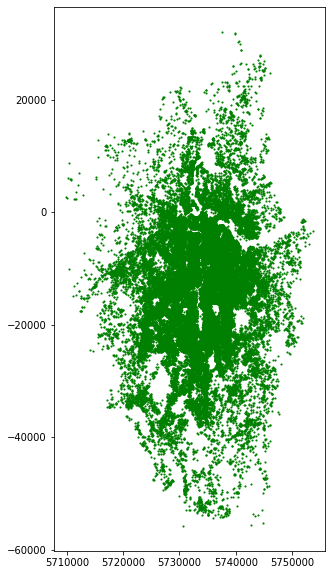

In [17]:
plt.figure(figsize=(10, 10))
df.plot(ax=plt.gca(), marker='.', markersize=5, color='green')